In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = '/Users/alinakozyreva/Documents/MIPT/00_Diploma/novelty_detection/data/multi_dimensional'

In [5]:
df = pd.read_csv(path+'/sensors_with_anomaly.csv')

In [3]:
df.shape

(219521, 53)

In [4]:
df.head(4)

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL


Подготовка данных

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

EDA

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
sensor_00,219521.0,2.371961,0.403223,0.000000,2.417187,2.455556,2.499826,2.549016
sensor_01,219521.0,47.590015,3.299447,0.000000,46.310760,48.133678,49.479160,56.727430
sensor_02,219521.0,50.863387,3.668355,33.159720,50.390620,51.649300,52.777770,56.032990
sensor_03,219521.0,43.746718,2.417856,31.640620,42.838539,44.227428,45.225693,48.220490
sensor_04,219521.0,590.629672,144.127709,2.798032,626.620400,632.754600,637.615723,800.000000
sensor_05,219521.0,73.397642,17.304487,0.000000,69.982320,75.578420,80.918750,99.999880
sensor_06,219521.0,13.500351,2.143252,0.014468,13.346350,13.628470,14.539930,22.251160
sensor_07,219521.0,15.841237,2.176726,0.000000,15.856480,16.167530,16.427950,23.596640
sensor_08,219521.0,15.198273,2.015901,0.028935,15.183740,15.451390,15.697340,24.348960
sensor_09,219521.0,14.796988,2.072470,0.000000,15.010130,15.082470,15.118630,25.000000


In [7]:
# Передискретизируем весь набор данных по среднесуточному показателю
rollmean = df.resample(rule='D').mean()
rollstd = df.resample(rule='D').std()

/var/folders/31/7wvz5xfn6m5ftz50_5p3kzkh0000gn/T/ipykernel_67297/909139737.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rollmean = df.resample(rule='D').mean()
/var/folders/31/7wvz5xfn6m5ftz50_5p3kzkh0000gn/T/ipykernel_67297/909139737.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rollstd = df.resample(rule='D').std()


Pre-processing and Feature Engineering

Отмасштабируем данные и применим анализ основных компонентов (PCA), чтобы выделить наиболее важные функции для дальнейшего использования в обучающих моделях. </br>
Обработка данных такого размера требует значительных вычислительных ресурсов (219521, 53), отсюда и причина уменьшения размерности с помощью PCA.

In [8]:
# Стандартизируем/масштабируем набор данных и примените PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

df2 = df.drop(['machine_status'], axis=1)
names=df2.columns
x = df[names]

scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

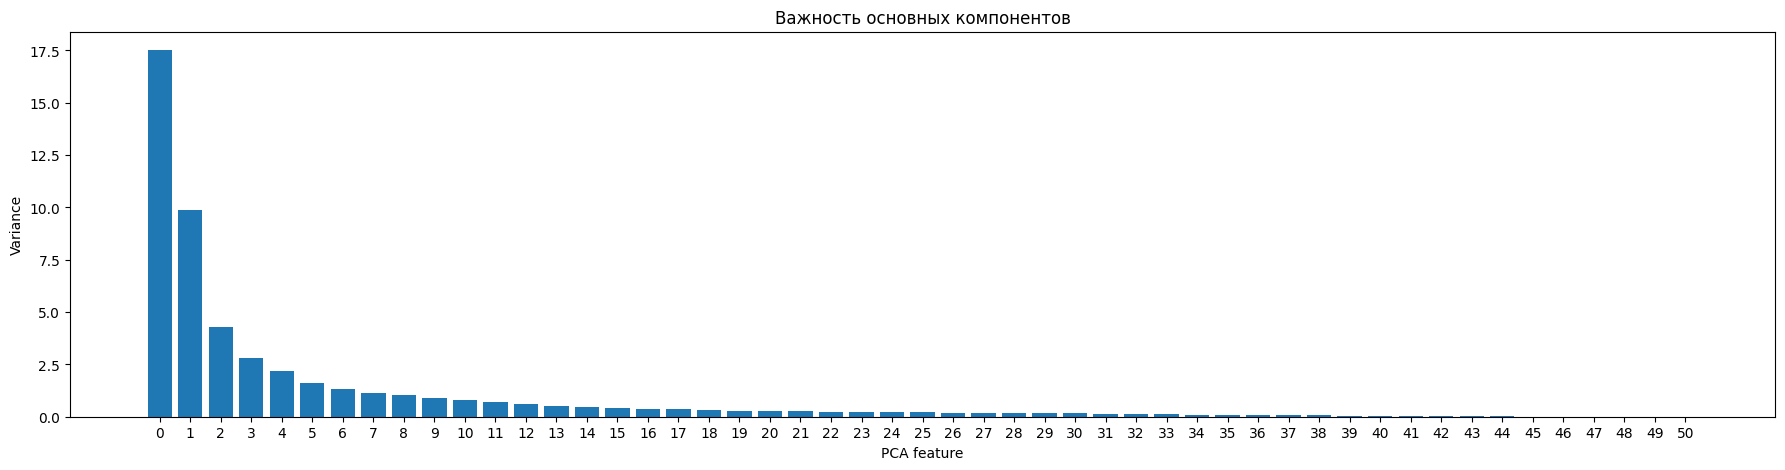

In [9]:
features = range(pca.n_components_)
_ = plt.figure(figsize=(22, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Важность основных компонентов")
plt.show()

In [10]:
# Расчет PCA с 2 компонентами
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])


In [11]:
df['pc1']=pd.Series(principalDf['pc1'].values, index=df.index)
df['pc2']=pd.Series(principalDf['pc2'].values, index=df.index)

In [12]:
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,pc1,pc2
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,72.736850,265.819997
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,72.736850,265.819997
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,30.802311,283.470003
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,27.329130,290.144344
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,32.911764,294.766508


Проверим стационарность с помощью критерия Дики-Фуллера

In [13]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(principalDf['pc1'])
# Вывод p-value
print(result[1])

5.4536849418485264e-05


In [14]:
result = adfuller(principalDf['pc2'])
# Вывод p-value
print(result[1])

1.8909142405452268e-06


Проверить автокорреляцию

In [15]:
# Вычислить изменение среднесуточного значения
pca1 = principalDf['pc1'].pct_change()

# Вычислить автокорреляцию
autocorrelation = pca1.dropna().autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -0.0020511948226788583


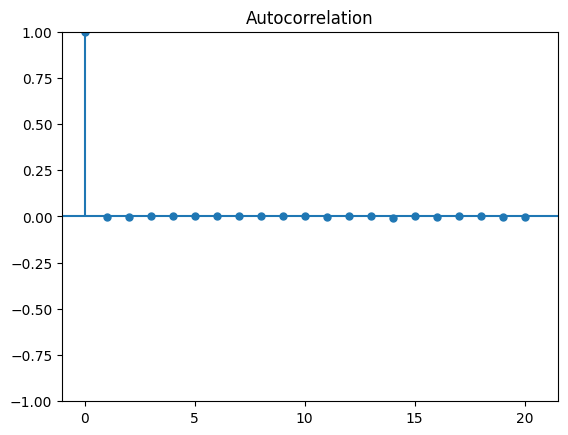

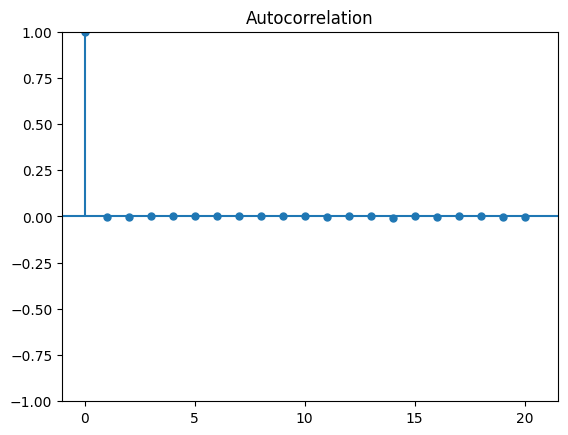

In [16]:
# Визуализация автокорреляции
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca1.dropna(), lags=20, alpha=0.05)

In [17]:
# Вычислить изменение среднесуточного значения
pca2 = principalDf['pc2'].pct_change()
# Вычислить автокорреляцию
autocorrelation = pca2.autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -3.151136204373642e-05


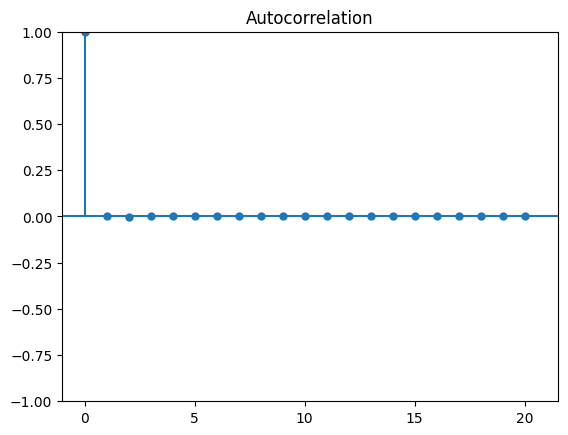

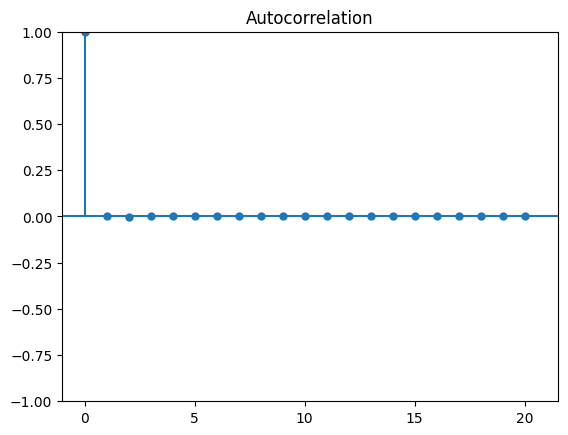

In [18]:
# Визуализация автокорреляции
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca2.dropna(), lags=20, alpha=0.05)

Данные являются стационарными и не автокоррелированными

#### Моделирование
Базовая модель: обнаружение выбросов с использованием межквартильного размаха (IQR) </br>

Аномалии определяются как редкие события, которые могут быть представлены выбросами в наборе данных. </br> 
Применение базового статистического метода. </br>

- 0: нормальные данные
- 1: аномалия

In [19]:
# outlier_lower = Q1 - (1.5*IQR)
# outlier_upper = Q3 + (1.5*IQR)

# Вычислим границы выбросов для pc1
q1_pc1, q3_pc1 = df['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)

# Вычислим границы выбросов для pc2
q1_pc2, q3_pc2 = df['pc2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)

In [20]:
lower_pc1, upper_pc1

(-736.3329510285982, 222.73590494563348)

In [21]:
lower_pc2, upper_pc2

(-738.2364730193817, 683.9742725958404)

In [22]:
df['anomaly_pc1'] = ((df['pc1']>upper_pc1) | (df['pc1']<lower_pc1)).astype('int')
df['anomaly_pc2'] = ((df['pc2']>upper_pc2) | (df['pc2']<lower_pc2)).astype('int')

In [23]:
df['anomaly_pc1'].value_counts()

0    189644
1     29877
Name: anomaly_pc1, dtype: int64

In [24]:
df['anomaly_pc2'].value_counts()

0    217947
1      1574
Name: anomaly_pc2, dtype: int64

In [25]:
outliers_pc1 = df.loc[(df['pc1']>upper_pc1) | (df['pc1']<lower_pc1), 'pc1']
outliers_pc2 = df.loc[(df['pc2']>upper_pc2) | (df['pc2']<lower_pc2), 'pc2']

In [26]:
len(outliers_pc1)/len(df)

0.13610087417604694

In [27]:
len(outliers_pc2)/len(df)


0.0071701568414866915

Выберем 3 самые важные функции в наборе данных, чтобы обнаружить в них аномалии. Чтобы выяснить эти особенности,примемним технику выбора одномерных признаков.

In [28]:
# Применить класс SelectKBest для извлечения 3 лучших функций — одномерный выбор функций
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

x = df.drop(['machine_status', 'pc1', 'pc2', 'anomaly_pc1', 'anomaly_pc2'], axis=1)
y = df['machine_status']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
bestfeatures = SelectKBest(score_func=chi2, k=3)

fit = bestfeatures.fit(x_scaled, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(3, 'Score'))

      Feature         Score
11  sensor_11  10106.761967
12  sensor_12   9879.052739
4   sensor_04   8167.176442


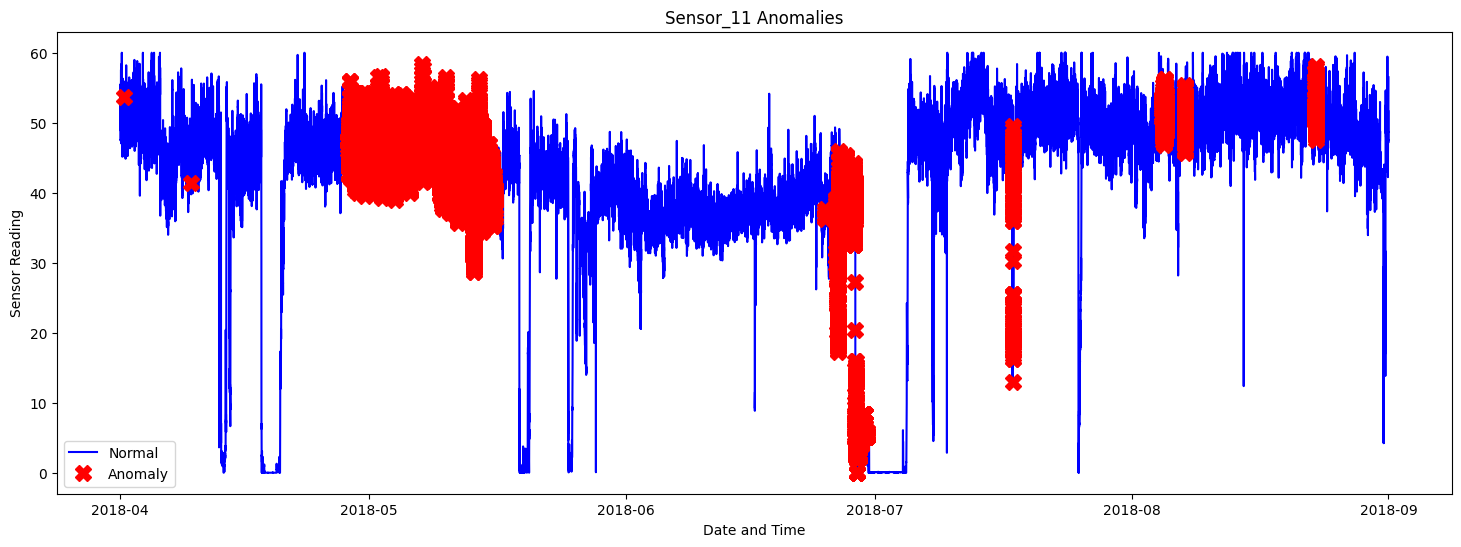

In [29]:
# нанесем выбросы от pc1 поверх датчика_11, посмотрим, где они произошли во временном ряду
a = df[df['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_11'], color='blue', label='Normal')
_ = plt.plot(a['sensor_11'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();

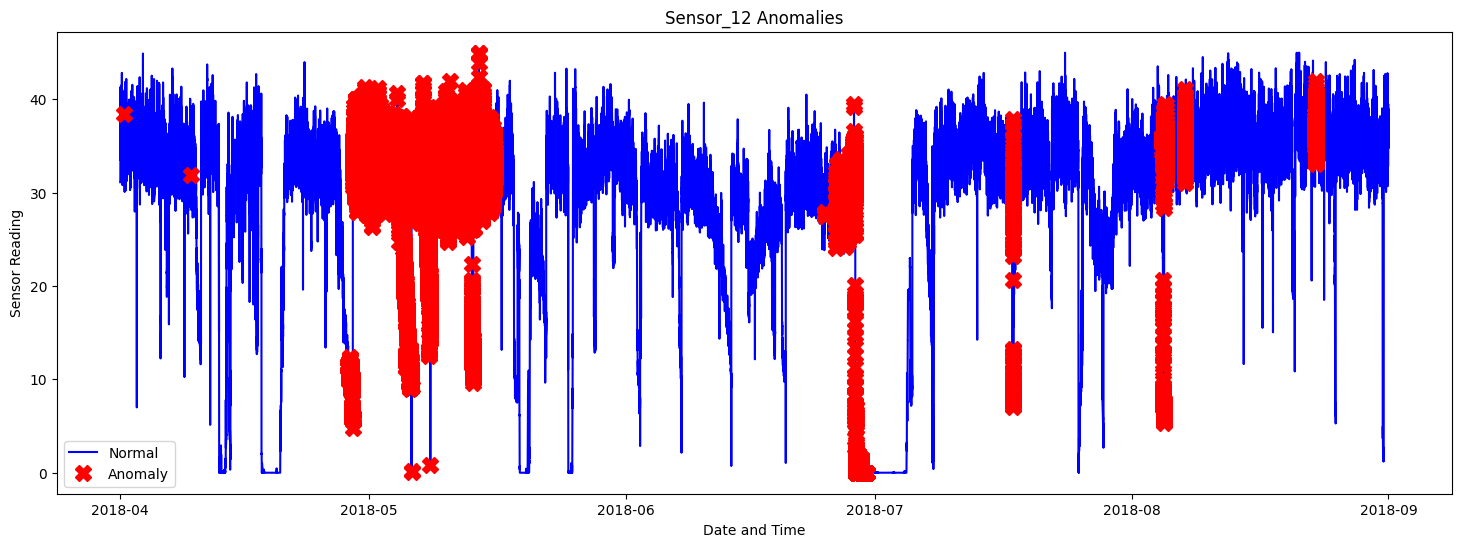

In [30]:
# нанесем выбросы от pc1 поверх датчика_00, посмотрим, где они произошли во временном ряду

a = df[df['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_12'], color='blue', label='Normal')
_ = plt.plot(a['sensor_12'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_12 Anomalies')
_ = plt.legend(loc='best')
plt.show();

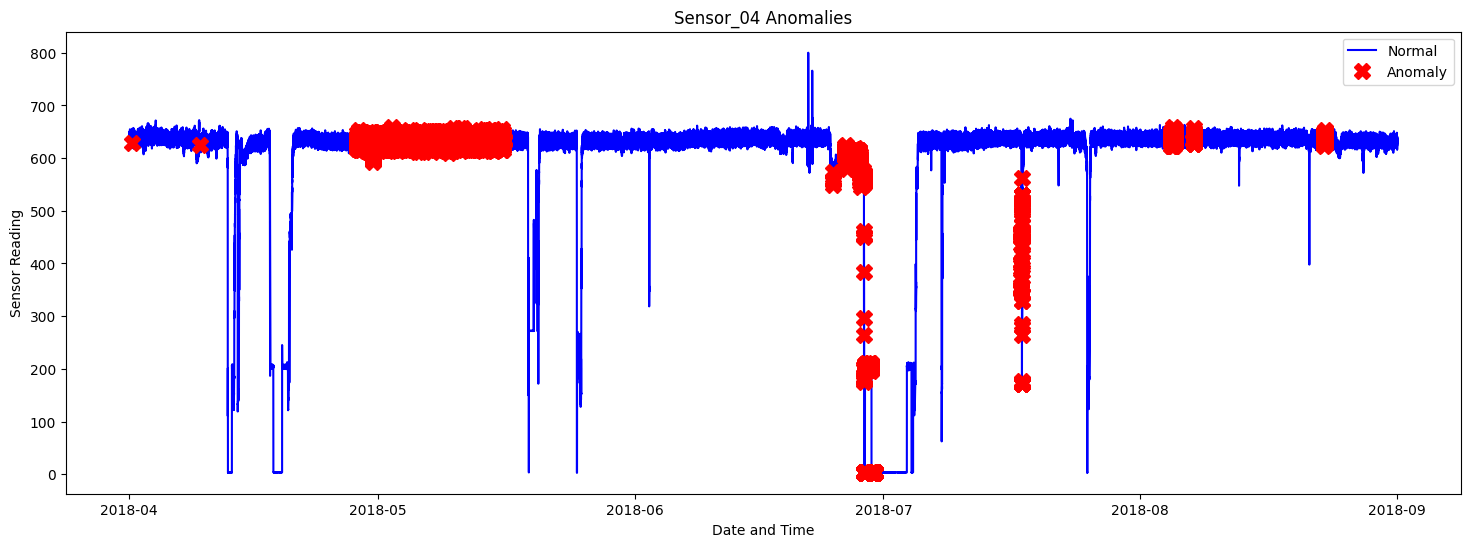

In [31]:
# нанесем выбросы от pc1 поверх датчика_04, посмотрим, где они произошли во временном ряду

a = df[df['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['sensor_04'], color='blue', label='Normal')
_ = plt.plot(a['sensor_04'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_04 Anomalies')
_ = plt.legend(loc='best')
plt.show();

Как видно из вышеизложенного, в pc1 (1-й главный компонент) гораздо больше выбросов, чем в pc2. Выбросы в pc1 составляют примерно 14% набора данных. Кроме того, выбросы в pc1, по-видимому, лучше объясняют сбои в показаниях одного из датчиков, в данном случае используется sensor_00.